In [2]:
import matplotlib.pyplot as plt
import numpy as np
import re

In [3]:
path = "/Users/anirudhindraganti/Desktop/DSC180/Interactive-Neural-Process/leam_us/active/data/model/dcrnn_DR_1_h_28_16_lr_0.0008_bs_128_0120222638_1_0/info.log"

In [4]:
all_training_losses = []

In [5]:
with open(path, "r") as f:
    curr_train_mae = []
    curr_train_kld = []
    ending_epochs = []
    for line in f:
        pattern = r"train_mae:\s([\d.]+),\s+train_kld:\s([\d.]+)"
        match = re.search(pattern, line)
        if match:
            train_mae = float(match.group(1))
            train_kld = float(match.group(2))
            curr_train_mae.append(train_mae)
            curr_train_kld.append(train_kld)

        pattern = r"Early stopping at epoch:\s(\d+)"
        match = re.search(pattern, line)
        if match:
            ending_epoch = int(match.group(1))
            ending_epochs.append(ending_epoch)

curr_train_mae = np.array(curr_train_mae) / 1000
ending_epochs = np.array(ending_epochs) + 1


In [6]:
ending_epochs

array([220, 248, 104, 184,  64,  79,  69,  66,  52, 116,  79, 152])

In [7]:
ending_indices = [sum(ending_epochs[:i + 1]) for i in range(12)]
ending_indices

[np.int64(220),
 np.int64(468),
 np.int64(572),
 np.int64(756),
 np.int64(820),
 np.int64(899),
 np.int64(968),
 np.int64(1034),
 np.int64(1086),
 np.int64(1202),
 np.int64(1281),
 np.int64(1433)]

/var/folders/jt/306qf4v971s1lvlty5nft1bc0000gp/T/ipykernel_19262/1532989132.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


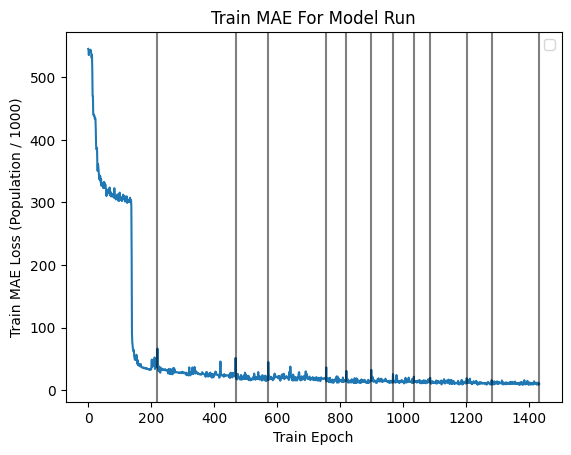

In [8]:
plt.plot(curr_train_mae)
plt.xlabel("Train Epoch")
plt.ylabel("Train MAE Loss (Population / 1000)")
plt.title("Train MAE For Model Run")

for i in range(12):
    plt.axvline(ending_indices[i], color="black", alpha=0.5)

plt.legend()